# Intro to Python Workshop #

## Pandas, Numpy and Matplotlib for Financial Data Analysis ## 

### Intro to Pandas ###

Before we can use the functions of third party modules, we need to import the module. Then, the methods of the module will be available for various use.


In [0]:
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

A string can be converted into datetime using the datetime function of datetime module. 

In [0]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2019, 12, 31)

We can create a list of stocks whose data we want to analyze.

In [0]:
stock_tickers = ['AMZN', 'MSFT', 'AAPL', 'GOOG', 'IBM']

We load the data using the DataReader functionality.

In [39]:
df = web.DataReader(stock_tickers[0], 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2012-01-03 to 2019-12-31
Data columns (total 6 columns):
High         2012 non-null float64
Low          2012 non-null float64
Open         2012 non-null float64
Close        2012 non-null float64
Volume       2012 non-null int64
Adj Close    2012 non-null float64
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


Pandas dataframes have index for both rows and columns.

In [41]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=2012, freq=None)

In [42]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

.loc and .iloc are recommended method for indexing, slicing and filtering dataframes.

In [43]:
df.loc[df.index<='2017-10-25', ['Adj Close']]

,Adj Close
Date,
2012-01-03,179.029999
2012-01-04,177.509995
2012-01-05,177.610001
2012-01-06,182.610001
2012-01-09,178.559998
...,...
2017-10-19,986.609985
2017-10-20,982.909973
2017-10-23,966.299988


In [44]:
df.iloc[:5,-1]

Date
2012-01-03    179.029999
2012-01-04    177.509995
2012-01-05    177.610001
2012-01-06    182.610001
2012-01-09    178.559998
Name: Adj Close, dtype: float64

In [45]:
df.loc[df.index<='2017-10-25', ['Adj Close']]

,Adj Close
Date,
2012-01-03,179.029999
2012-01-04,177.509995
2012-01-05,177.610001
2012-01-06,182.610001
2012-01-09,178.559998
...,...
2017-10-19,986.609985
2017-10-20,982.909973
2017-10-23,966.299988


From the data we imported we will only use two columns - Volume and Adj Close.

In [0]:
df = df[['Adj Close', 'Volume']]

We will use matplotlib module to see stock prices over time in a line plot. 

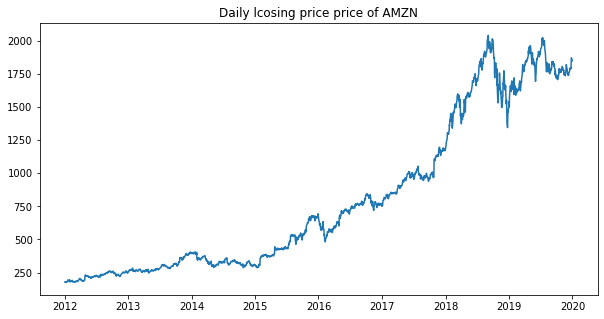

In [145]:
mpl.rc('figure', figsize=(10, 5))
plt.plot(df['Adj Close'])
plt.title('Daily lcosing price price of ' + stock_tickers[0])
plt.show()

### Financial Data Analysis ### 

A datetime format gives us more ways of extracting information from date which can then be assigned back to the Pandas' dataframes as columns. 


In [48]:
df['Year']=df.index.year
df['Month']=df.index.month
df['Weekday']=df.index.weekday
df.head()

,Adj Close,Volume,Year,Month,Weekday
Date,,,,,
2012-01-03,179.029999,5110800,2012,1,1
2012-01-04,177.509995,4205200,2012,1,2
2012-01-05,177.610001,3809100,2012,1,3
2012-01-06,182.610001,7008400,2012,1,4
2012-01-09,178.559998,5056900,2012,1,0


Methods such as .groupby, .apply and .agg are some of the most widely used methods for data analysis. 

In [0]:
df.groupby('Year')['Adj Close'].mean()

Year
2012     220.303640
2013     298.031588
2014     332.551033
2015     478.138295
2016     699.523135
2017     968.167012
2018    1641.726176
2019    1789.189206
Name: Adj Close, dtype: float64

Let's calculate the daily return rate of this stock.

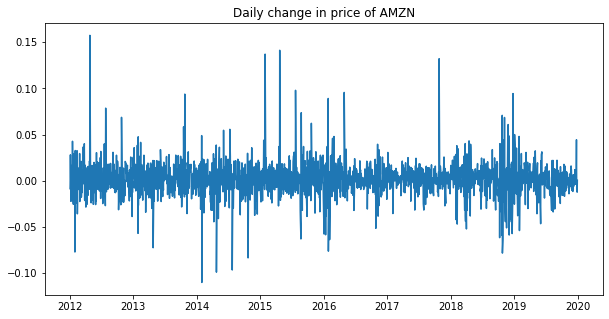

In [162]:
df['returns'] = df['Adj Close'] / df['Adj Close'].shift(1) -1
plt.plot(df['returns'])
plt.title('Daily change in price of ' + stock_tickers[0])
plt.show()

A __(simple) moving average (MA)__ is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random short-term price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

The length of the moving average to use depends on the trading objectives, with shorter moving averages used for short-term trading and longer-term moving averages more suited for long-term investors. The 50-day and 200-day MAs are widely followed by investors and traders, with breaks above and below this moving average considered to be important trading signals.

Source: https://www.investopedia.com/terms/m/movingaverage.asp

In [51]:
df['MA_50d'] = df['Adj Close'].rolling(window=50).mean().shift()
df['MA_100d'] = df['Adj Close'].rolling(window=100).mean().shift()
df.tail()

,Adj Close,Volume,Year,Month,Weekday,returns,MA_50d,MA_100d
Date,,,,,,,,
2019-12-24,1789.209961,881300,2019,12,1,-0.002114,1770.858794,1776.545897
2019-12-26,1868.770020,6005400,2019,12,3,0.044467,1771.914392,1776.205597
2019-12-27,1869.800049,6186600,2019,12,4,0.000551,1773.942192,1777.241997
2019-12-30,1846.890015,3674700,2019,12,0,-0.012253,1775.789592,1778.061698
2019-12-31,1847.839966,2506500,2019,12,1,0.000514,1776.977793,1778.596598


Now, let's plot the adjusted closing price along with the two moving averages we calculated above in one plot. 

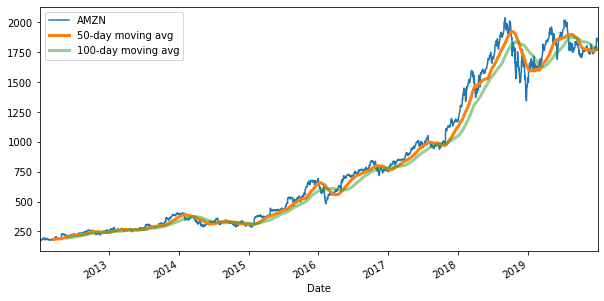

In [150]:
df['Adj Close'].plot(label=stock_tickers[0])
df['MA_50d'].plot(label='50-day moving avg', linewidth=3)
df['MA_100d'].plot(label='100-day moving avg',  linewidth=3, alpha=.5)
plt.legend()
plt.show()

__Volatility__ is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index.

Source: https://www.investopedia.com/terms/v/volatility.asp

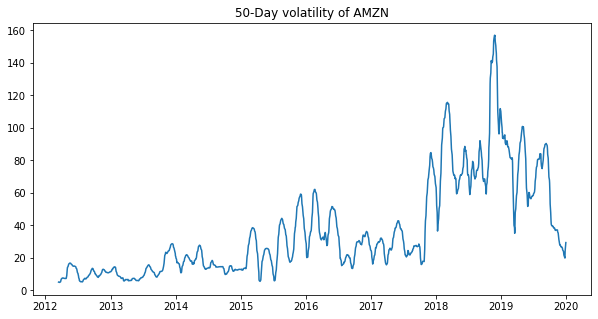

In [171]:
df['volatility'] = df['Adj Close'].rolling(50).std().shift() 
plt.plot(df['volatility'])
plt.title('50-Day volatility of ' + stock_tickers[0])
plt.show()

### Predicting Stock Prices ### 

We can build a linear regression model to predict future stock prices and see how it performs by comparing it against the actual data. Let's prepare the data for this task. 

In [172]:
npred = 200
df['prediction'] = df['Adj Close'].shift(-npred)
df.tail(10)

,Adj Close,Volume,Year,Month,Weekday,returns,MA_50d,MA_100d,volatility,prediction
Date,,,,,,,,,,
2019-12-17,1790.660034,3644400,2019,12,1,0.012124,1764.176194,1781.842496,24.091780,NaN
2019-12-18,1784.030029,3351400,2019,12,2,-0.003703,1765.336194,1780.318596,23.939176,NaN
2019-12-19,1792.280029,2652800,2019,12,3,0.004624,1766.906594,1779.034397,22.464531,NaN
2019-12-20,1786.500000,5150800,2019,12,4,-0.003225,1768.312395,1777.971897,21.785410,NaN
2019-12-23,1793.000000,2136400,2019,12,0,0.003638,1769.637195,1777.169097,20.795212,NaN
2019-12-24,1789.209961,881300,2019,12,1,-0.002114,1770.858794,1776.545897,20.323016,NaN
2019-12-26,1868.770020,6005400,2019,12,3,0.044467,1771.914392,1776.205597,19.863790,NaN
2019-12-27,1869.800049,6186600,2019,12,4,0.000551,1773.942192,1777.241997,24.112318,NaN
2019-12-30,1846.890015,3674700,2019,12,0,-0.012253,1775.789592,1778.061698,27.662215,NaN


In [0]:
X = df[['Volume','MA_50d', 'prediction']].copy() #'Volume', 'returns', 'Month', 
X.dropna(inplace=True)
y = X[['prediction']]
X.drop('prediction', axis=1, inplace=True)

In [0]:
X_train = X[:-npred]
X_test = X[-npred:]
y_train = y[:-npred]
y_test = y[-npred:]

In [175]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred.shape

(200, 1)

In [0]:
y_pred = pd.DataFrame( y_pred, index=y_test.index)

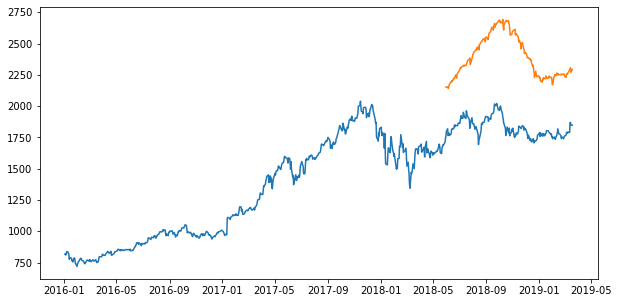

In [177]:
plt.plot(df.loc[df.index >= '2016-01-01', ['prediction']])
plt.plot(y_pred)
plt.show()

Now that we have the results for the first stock in the list, we can use the same methodology to obtains results for the rest of the stocks in the stock_tickers list. However, we can avoid having to repeat these codes over and over again for each stock on the list by creating a function that binds these operations.

In [0]:
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LinearRegression 

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 12, 31)

# list of companies whose stock you want to analyze
stock_tickers = ['AMZN', 'MSFT', 'AAPL', 'GOOG', 'IBM']

In [0]:
def lrpredictions(stockticker, start, end, npred, show_result=False):
    
  # preprocessing
  df = web.DataReader(stockticker, 'yahoo', start, end)
  df = df[['Adj Close', 'Volume']]
  df['Year']=df.index.year
  df['Month']=df.index.month
  df['Weekday']=df.index.weekday
  df['returns'] = df['Adj Close'] / df['Adj Close'].shift(1) -1
  df['MA_50d'] = df['Adj Close'].rolling(window=50).mean().shift()
  df['MA_100d'] = df['Adj Close'].rolling(window=100).mean().shift()
  df['volatility'] = df['Adj Close'].rolling(50).std().shift() 
  df['prediction'] = df['Adj Close'].shift(-npred)
  
  # data for linear regression
  X = df[['Volume', 'MA_50d', 'prediction']].copy()
  X.dropna(inplace=True)
  y = X[['prediction']]
  X.drop('prediction', axis=1, inplace=True)

  # split train and test sets
  X_train = X[:-npred]
  X_test = X[-npred:]
  y_train = y[:-npred]
  y_test = y[-npred:]

  # linear regression model fitting and prediction
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)

  # plot real vs prediction values
  y_pred = pd.DataFrame( y_pred, index=y_test.index)
  mpl.rc('figure', figsize=(10, 5))
  plt.plot(df.loc[df.index >= '2016-01-01', ['prediction']])
  plt.plot(y_pred)
  plt.title('Actual vs. Prediction for '+ stockticker)
  plt.ylabel('Stock price')
  plt.show()

  if show_result:
    return [X, y, y_pred]

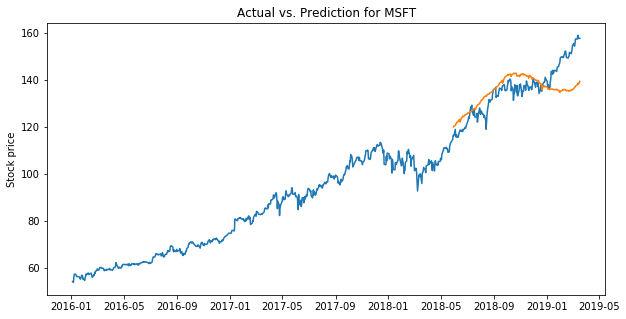

In [180]:
lrpredictions(stock_tickers[1], start, end, 200)

We can use a loop to do this all at once. 

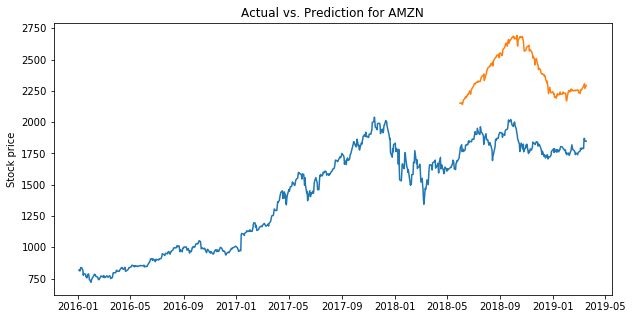

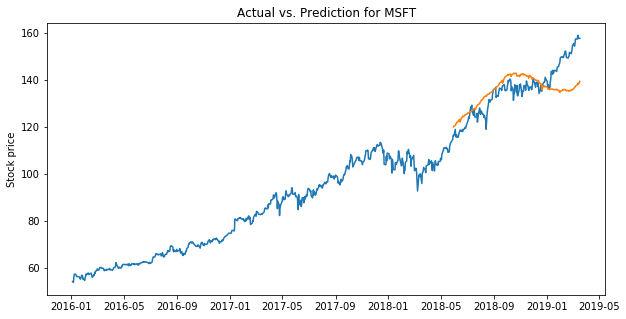

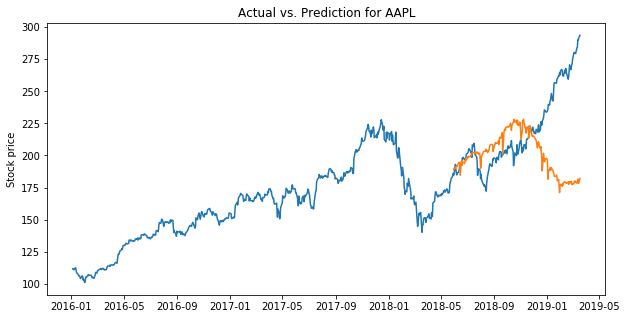

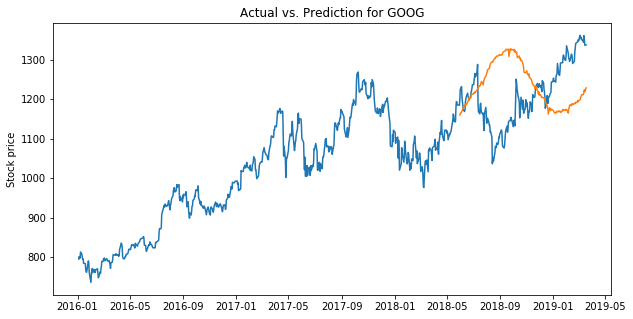

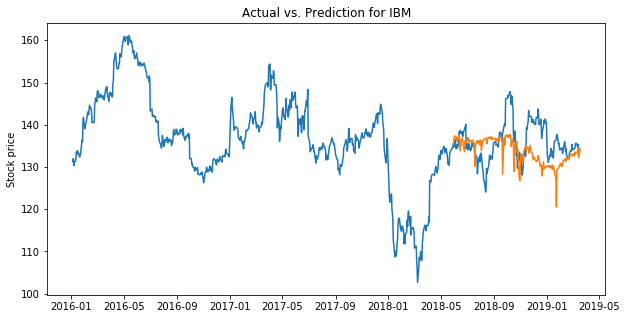

In [184]:
for i in range(0, len(stock_tickers)):
  lrpredictions(stock_tickers[i], start, end, 200)